In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/DATA CHẤT LƯỢNG KHÔNG KHÍ/data của viện nhi/pneumonia_01july2024 (2).xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/DATA CHẤT LƯỢNG KHÔNG KHÍ/data của viện nhi/data_output (1).xlsx')

df = pd.concat([df1, df2], axis=1)




date           0
holiday        0
thang          0
nam            0
dow            0
weekend        0
hn_dmo3a     935
hn_dmo3m     937
hn_dmno      124
hn_dmno2     137
hn_dmnox     124
hn_dmco       41
hn_dmpm10    281
hn_dmpm25    288
hn_dmpm1     315
hn_dmwisp      4
hn_dmso2     543
hn_dmtemp      4
hn_dmhum       3
dtype: int64


In [ ]:
benh = df1['count']
count = np.array(benh)

print("==== Thống kê mô tả cơ bản ====")
print(benh.describe())  # Mean, min, max, std, etc.
print("\nGiá trị median của các cột:\n", benh.median())
print("\nGiá trị mode của các cột:\n", benh.mode().iloc[0])  # Lấy mode đầu tiên
print("\nPhân phối của các cột:\n", benh.skew())  # Độ lệch phân phối (Skewness)

count.mean()

==== Thống kê mô tả cơ bản ====
count    3652.000000
mean       33.155257
std        15.579370
min         4.000000
25%        21.000000
50%        30.000000
75%        43.000000
max        94.000000
Name: count, dtype: float64

Giá trị median của các cột:
 30.0

Giá trị mode của các cột:
 23

Phân phối của các cột:
 0.8183022385056964


33.1552573932092

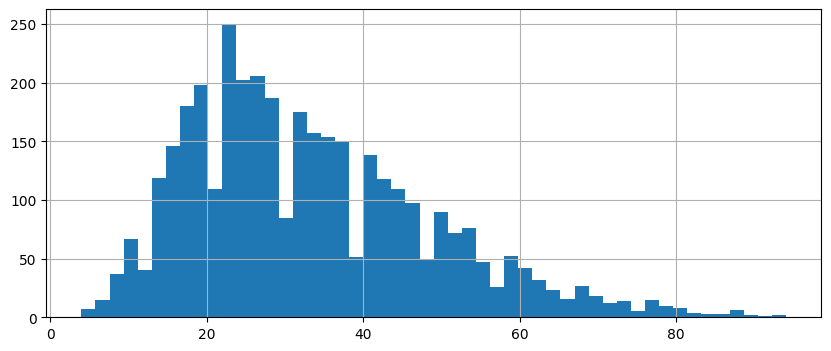

In [ ]:
# 2. Trực quan hóa dữ liệu
# Histogram cho các cột số
benh.hist(bins=50, figsize=(10, 4))
plt.show()

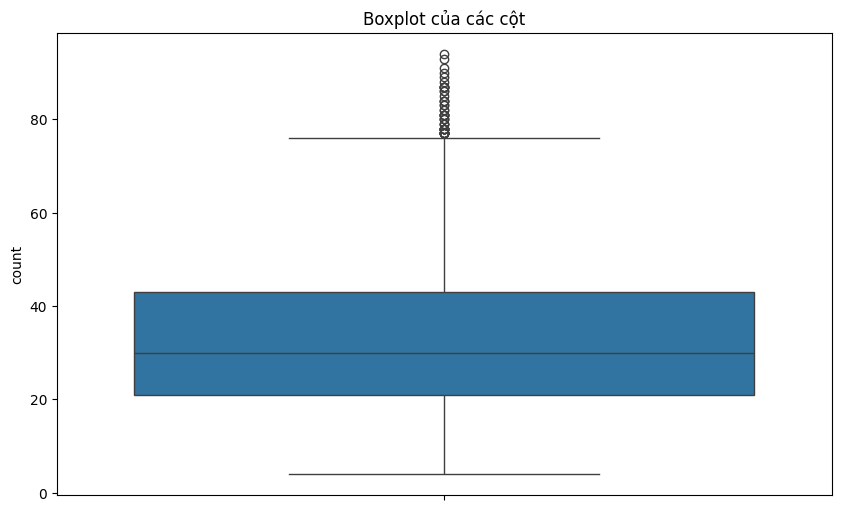

In [ ]:
# Boxplot để phát hiện outliers (ngoại lệ)
plt.figure(figsize=(10, 6))
sns.boxplot(data=benh)
plt.title('Boxplot của các cột')
plt.show()

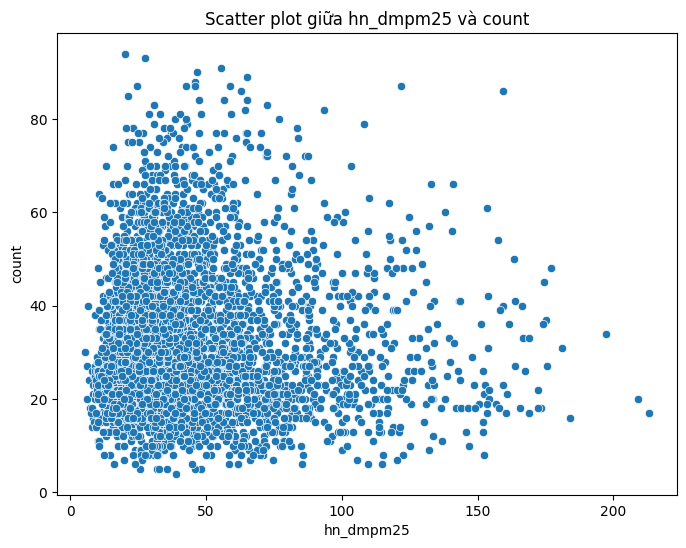

In [ ]:
# Scatter plot để xem mối quan hệ giữa hai biến
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2['hn_dmpm25'], y=df1['count'])
plt.title('Scatter plot giữa hn_dmpm25 và count')
plt.show()

In [ ]:
df_copy = df.copy()
df_copy.isnull().sum()

,0
date,0
count,0
date,0
holiday,0
thang,0
nam,0
dow,0
weekend,0
hn_dmo3a,0
hn_dmo3m,0


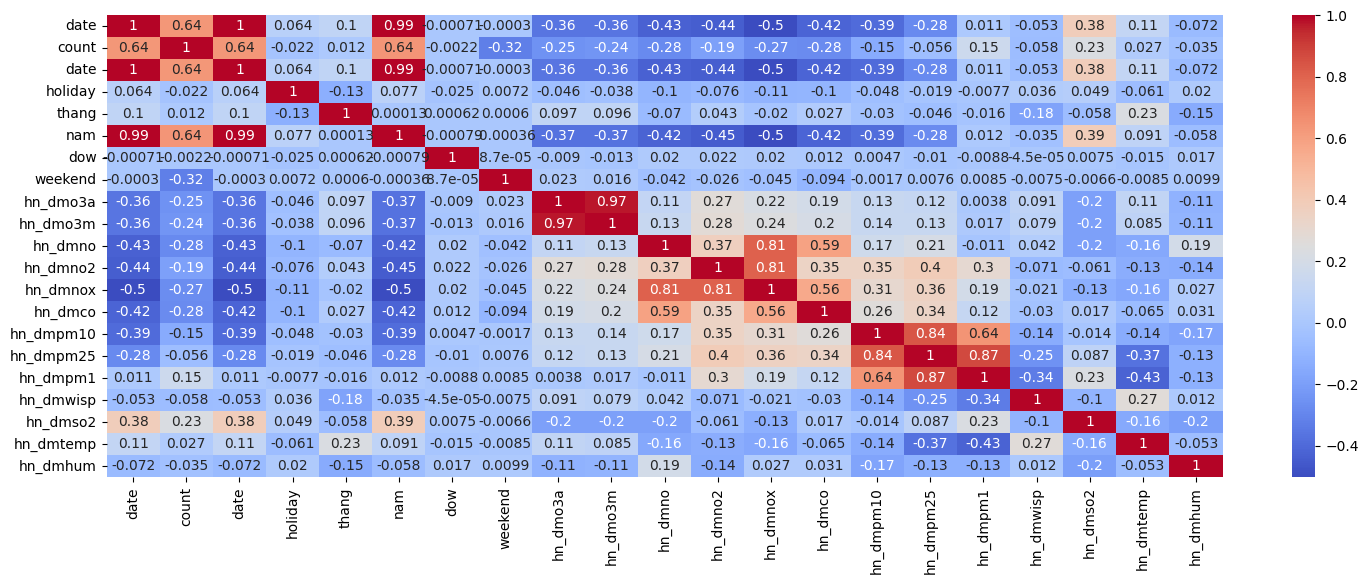

In [ ]:
corr = df_copy.corr()

plt.figure(figsize=(18, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Tính toán số lượng dòng cho từng phần
data = df_copy
total_rows = len(data)
train_size = int(0.9 * total_rows)
val_size = int(0.05 * total_rows)
test_size = total_rows - train_size - val_size
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(how='any', axis=0, inplace=True)

# Chia DataFrame thành các tập huấn luyện, kiểm tra và kiểm định
data_train = data.iloc[:train_size]
data_val = data.iloc[train_size:train_size + val_size]
data_test = data.iloc[train_size + val_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import warnings

# Tắt cảnh báo SettingWithCopyWarning
pd.options.mode.chained_assignment = None
# Chuẩn hóa các cột giá dựa trên tập huấn luyện và áp dụng cho tập kiểm tra và kiểm định
scaler_price = MinMaxScaler(feature_range=(-1, 1))
# price_columns = ['count', 'holiday', 'weekend', 'hn_dmpm25','hn_dmno2','hn_dmco']
price_columns = ['count','weekend','hn_dmpm10','hn_dmpm25','hn_dmno2','hn_dmso2']
data_train[price_columns] = scaler_price.fit_transform(data_train[price_columns])
data_val[price_columns] = scaler_price.transform(data_val[price_columns])
data_test_copy=data_test[price_columns]
data_test[price_columns] = scaler_price.transform(data_test[price_columns])
train_data = data_train[price_columns].values
val_data = data_val[price_columns].values
test_data = data_test[price_columns].values

# Hiển thị kích thước của các tập dữ liệu
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

Training data shape: (3286, 6)
Validation data shape: (182, 6)
Test data shape: (184, 6)


In [ ]:
# Training data
seq_len = 12
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i])
  y_train.append(train_data[:, 0][i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 0][i])
X_val, y_val = np.array(X_val), np.array(y_val)


# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 0][i])
X_test, y_test = np.array(X_test), np.array(y_test)

print('Training set shape', X_train.shape, y_train.shape)
print('Validation set shape', X_val.shape, y_val.shape)
print('Testing set shape' ,X_test.shape, y_test.shape)

Training set shape (3274, 12, 6) (3274,)
Validation set shape (170, 12, 6) (170,)
Testing set shape (172, 12, 6) (172,)


In [ ]:
# from keras.layers import LSTM, Dense, Input, Permute, Reshape, Multiply, RepeatVector, Lambda, Activation
# from keras.models import Model
# import keras.backend as K

# # Tạo tầng Attention
# def attention_block(inputs):
#     """
#     Tầng Attention:
#     - Inputs: tensor có kích thước (batch_size, time_steps, features)
#     - Outputs: tensor có cùng kích thước nhưng với trọng số Attention áp dụng.
#     """
#     # Tính trọng số Attention (dựa trên time_steps)
#     attention_weights = Dense(inputs.shape[1], activation='relu')(inputs)
#     # Apply softmax using Activation layer
#     attention_weights = Dense(inputs.shape[1], activation='relu')(attention_weights) # Change to linear activation
#     attention_weights = Activation('softmax', name="attention_weights")(attention_weights) # Apply softmax with Activation layer

#     # Nhân trọng số Attention với đầu vào
#     attended_inputs = Multiply(name="attention_applied")([inputs, attention_weights])

#     return attended_inputs
# input_layer = Input(shape=(12, 6))

# # Tầng LSTM đầu tiên
# x = LSTM(12, return_sequences=True)(input_layer)

# # Thêm Attention
# x = attention_block(x)

# # Tầng LSTM tiếp theo (cuối cùng)
# x = LSTM(100, return_sequences=False)(x)

# x = Dense(100, activation='relu')(x)

# # Tầng Dense đầu ra
# output_layer = Dense(1)(x)

# # Khởi tạo mô hình
# model = Model(inputs=input_layer, outputs=output_layer)
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Huấn luyện mô hình
# model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val), verbose=1)

In [ ]:
from keras.layers import LSTM, Dense, Input
import matplotlib.pyplot as plt
from keras.models import Model

# Tạo tầng Input
input_layer = Input(shape=(12, 6))

# Thêm các tầng LSTM
x = LSTM(50, return_sequences=True)(input_layer)
x = LSTM(100, return_sequences=True)(x)  # Thêm tầng LSTM thứ 2
x = LSTM(200, return_sequences=False)(x)  # Tầng LSTM cuối cùng

# Tầng Dense đầu ra
output_layer = Dense(1)(x)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# # Predicting and reversing normalization
# predicted_stock_price = model.predict(X_test)
# predicted_stock_price = scaler_price.inverse_transform(np.concatenate((predicted_stock_price, np.zeros((len(predicted_stock_price), 5))), axis=1))[:,0]

Epoch 1/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0732 - val_loss: 0.1351
Epoch 2/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0487 - val_loss: 0.1068
Epoch 3/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0450 - val_loss: 0.1015
Epoch 4/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0374 - val_loss: 0.1059
Epoch 5/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0377 - val_loss: 0.1038
Epoch 6/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0354 - val_loss: 0.1027
Epoch 7/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0334 - val_loss: 0.1198
Epoch 8/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0346 - val_loss: 0.0779
Epoch 9/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0312 - val_loss: 0.0882
Epoch 10/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0307 - val_loss: 0.1120
Epoch 11/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0312 - val_loss: 0.0818
Epoch 12/25
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/

In [ ]:
# Predicting and reversing normalization
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler_price.inverse_transform(np.concatenate((predicted_stock_price, np.zeros((len(predicted_stock_price), 5))), axis=1))[:,0]

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


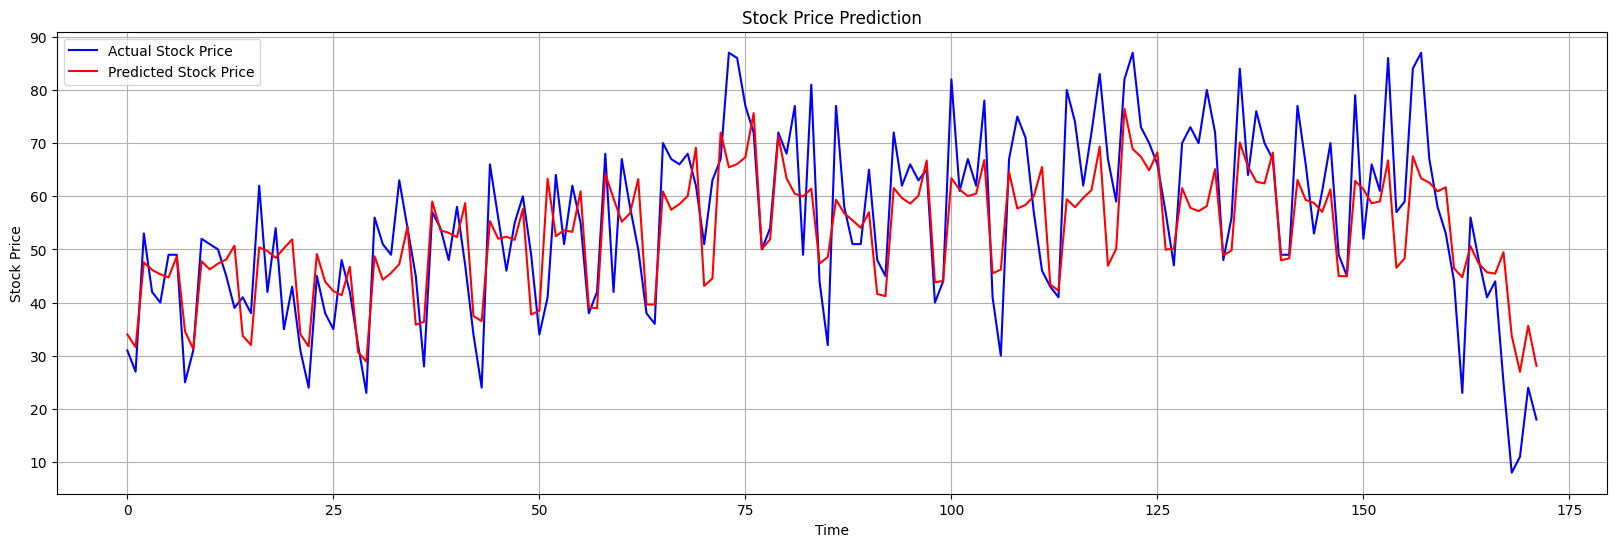

Root Mean Squared Error: 9.970318291446112
Mean Absolute Percentage Error: 0.1758997262299819


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Get actual prices from the last part of the test set
actual_prices = data_test_copy['count'].values[seq_len:]

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(actual_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
rmse = mean_squared_error(actual_prices, predicted_stock_price, squared=False)
print(f"Root Mean Squared Error: {rmse}")

mape = mean_absolute_percentage_error(actual_prices, predicted_stock_price)
print(f"Mean Absolute Percentage Error: {mape}")
